In [ ]:
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [6]:
import tkinter as Tk
import socket
from tqdm import tqdm
root = Tk()

# specify size of window.
root.geometry("250x170")

# Create text widget and specify size.
T = Text(root, height = 5, width = 52)

# Create label
l = Label(root, text = "Fact of the Day")
l.config(font =("Courier", 14))

Fact = """A man can be arrested in
Italy for wearing a skirt in public."""

# Create button for next text.
b1 = Button(root, text = "Next", )

# Create an Exit button.
b2 = Button(root, text = "Exit",
			command = root.destroy)

l.pack()
T.pack()
b1.pack()
b2.pack()


TypeError: ignored

In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [ ]:
train = train_dataset.take(4000)
test = test_dataset.take(1000)


In [ ]:
# to shuffle the data ...
BUFFER_SIZE = 4000 # we will put all the data into this big buffer, and sample randomly from the buffer
BATCH_SIZE = 128  # we will read 128 reviews at a time

train = train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)

In [ ]:
train = train.prefetch(BUFFER_SIZE)
test = test.prefetch(BUFFER_SIZE)

In [ ]:
VOCAB_SIZE= 1000 # assuming our vocabulary is just 1000 words

encoder = layers.experimental.preprocessing.TextVectorization(max_tokens=VOCAB_SIZE)

encoder.adapt(train.map(lambda text, label: text)) # we just encode the text, not the labels
encoder

In [ ]:
# here are the first 20 words in our 1000-word vocabulary
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'i', 'it',
       'this', 'that', 'br', 'was', 'as', 'with', 'for', 'but', 'movie'],
      dtype='<U14')

In [ ]:
example, label = list(train.take(1))[0] # that's one batch
example

<tf.Tensor: shape=(128,), dtype=string, numpy=
array([b'A fashion designer trips over a cat and falls into a pool, hitting her head on something floating on the surface. With rather cheesy effects (this was a TV movie) she floats up out of her body. She floats through a tunnel of rings of swirling orange smoke, and black rigid figures tip into her view (they look like the mannequins in her apartment). I almost thought I was watching a Jess Franco movie.... As her friends revive her, a black arm grabs her by the wrist, and she has to struggle to get loose. When she is revived, she remembers everything, and has a nasty bruise on her forearm.<br /><br />Shortly thereafter, she nearly gets hit by an out-of-control car that comes up on the sidewalk behind her. On Halloween, she decides with her boyfriend to go to Mexico for a vacation. When she gets there, she\'s surprised to find it\'s the Day of the Dead. They\'re annoyed by another American tourist who keeps following them, and he almost

In [ ]:
example[4].numpy()

b'Never saw the original movie in the series...I only hope it was a much better movie than this or the sequel made in the 1980\'s as if it is not how were these two terrible sequels even justified. This movie had a really good lead in when they were advertising it to be shown on one of those old independent stations that are a thing of the past now. Anyways it looked like it would be a pretty good scary movie. It was, however, a movie that would make some Walt Disney movies look dark. Really, this movie was just a bunch of light fluff with virtually no boggy creek creature to be seen. The only real sighting is near the end when you see its shape during a very heavy rainstorm, other than that there is virtually no sign of the creature which was really disappointing as a kid. The story is basically the old evil hunters must kill anything they see and are after the boggy creek creature and kids are out to help it or just some random hairy guy in the woods that likes to pull random boats t

In [ ]:
encoded_example = encoder(example[1:6]).numpy()
encoded_example

array([[  9,   1,  54, ..., 784,   6,   1],
       [ 11,  19,   1, ...,   0,   0,   0],
       [ 11,  19,  46, ...,   0,   0,   0],
       [114, 208,   2, ...,   0,   0,   0],
       [211, 111,   2, ...,   0,   0,   0]])

In [ ]:
model = tf.keras.Sequential([
    encoder, # the encoder
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(layers.LSTM(64)), # making LSTM bidirectional
    tf.keras.layers.Dense(32, activation='relu'), # FC layer for the classification part
    tf.keras.layers.Dense(1) # final FC layer

])

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

[0.00521468]


In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    # adam optimizer is more efficient (not always the most accurate though)
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 134,209
Trainable params: 134,209
Non-tr

In [ ]:
H2 = model.fit(train, epochs=25,
                    validation_data=test)

Epoch 1/25
32/32 [==============================] - 77s 2s/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6929 - val_accuracy: 0.5030
Epoch 2/25
32/32 [==============================] - 69s 2s/step - loss: 0.6924 - accuracy: 0.4967 - val_loss: 0.6926 - val_accuracy: 0.5030
Epoch 3/25
32/32 [==============================] - 67s 2s/step - loss: 0.6916 - accuracy: 0.4967 - val_loss: 0.6920 - val_accuracy: 0.5030
Epoch 4/25
32/32 [==============================] - 67s 2s/step - loss: 0.6903 - accuracy: 0.4967 - val_loss: 0.6909 - val_accuracy: 0.5030
Epoch 5/25
32/32 [==============================] - 66s 2s/step - loss: 0.6878 - accuracy: 0.4967 - val_loss: 0.6886 - val_accuracy: 0.5030
Epoch 6/25
32/32 [==============================] - 66s 2s/step - loss: 0.6784 - accuracy: 0.5033 - val_loss: 0.6756 - val_accuracy: 0.5130
Epoch 7/25
32/32 [==============================] - 65s 2s/step - loss: 0.6545 - accuracy: 0.5825 - val_loss: 0.6642 - val_accuracy: 0.5480
Epoch 8/25
32/32 [==

In [ ]:
def plot_results(H):
    results = pd.DataFrame({"Train Loss": H.history['loss'], "Validation Loss": H.history['val_loss'],
              "Train Accuracy": H.history['accuracy'], "Validation Accuracy": H.history['val_accuracy']
             })
    fig, ax = plt.subplots(nrows=2, figsize=(11, 11))
    results[["Train Loss", "Validation Loss"]].plot(ax=ax[0])
    results[["Train Accuracy", "Validation Accuracy"]].plot(ax=ax[1])
    ax[0].set_xlabel("Epoch")
    ax[1].set_xlabel("Epoch")
    plt.show()

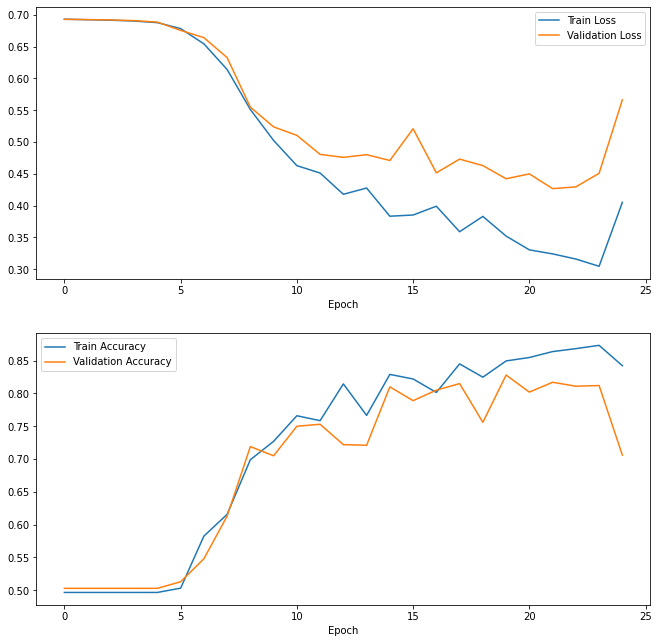

In [ ]:
plot_results(H2)